In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import array
from sklearn.metrics import accuracy_score
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

In [2]:
#loaading the training dataset
train = pd.read_csv(r'C:\Users\KEERTI\Desktop\train.csv') 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
del train['Cabin']

In [5]:
#remove rows with null values
train=train.dropna(subset = ['Age', 'Embarked'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


0    424
1    288
Name: Survived, dtype: int64


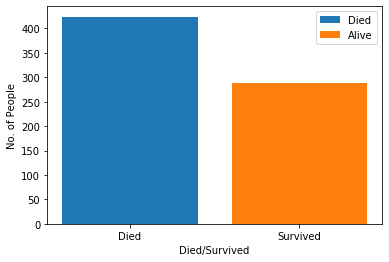

In [10]:
import matplotlib.pyplot as plt
x=train["Survived"].value_counts()
y=["Died","Survived"]
print(x)
plt.bar (y[0],x[0],label = "Died",align = "center" )
plt.bar (y[1],x[1],label = "Alive",align = "center")
plt.legend()
plt.ylabel ("No. of People")
plt.xlabel ("Died/Survived")
plt.show()

In [11]:
train = train.drop (columns=['Name'])

train = train.drop (columns=['PassengerId'])

train = train.drop (columns=['Ticket'])

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [12]:
#Convert categorical variable into dummy/indicator variables.
train = pd.get_dummies(train)
train.info()
X = train.iloc[:, [1,2,3,4,5,6,7,8,9,10]].values
Y = train.iloc[:, [0]].values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
Survived      712 non-null int64
Pclass        712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
Sex_female    712 non-null uint8
Sex_male      712 non-null uint8
Embarked_C    712 non-null uint8
Embarked_Q    712 non-null uint8
Embarked_S    712 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 42.4 KB


In [13]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [62]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [63]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [64]:
classifier = RandomForestClassifier(n_estimators = 80, criterion = 'entropy', max_depth = 6)
classifier.fit(X_Train,Y_Train)

C:\Users\KEERTI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
Y_Pred = classifier.predict(X_Test)
Y_Pred
                            

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [66]:
cm = confusion_matrix(Y_Test, Y_Pred)
cm
accuracy_score(Y_Test, Y_Pred)

1.0

In [67]:
#loading test dataset
test = pd.read_csv (r'C:\Users\KEERTI\Desktop\test.csv')
test = test.drop (columns=['Name'])
#test = test.drop (columns=['PassengerId'])
test = test.drop (columns=['Ticket'])
test = test.drop (columns=['Cabin'])
#loading the survival data for passengers with corresponding PassengerId in test
test1 = pd.read_csv (r'C:\Users\KEERTI\Desktop\gender_submission.csv')

#joining the survival data for passengers with corresponding PassengerId in test
test=(pd.merge(test1,test,left_on='PassengerId', right_on='PassengerId', how='left').drop('PassengerId', axis=1))
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [68]:
#remove rows with null values
test=test.dropna(subset=['Age','Fare'])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 8 columns):
Survived    331 non-null int64
Pclass      331 non-null int64
Sex         331 non-null object
Age         331 non-null float64
SibSp       331 non-null int64
Parch       331 non-null int64
Fare        331 non-null float64
Embarked    331 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 23.3+ KB


In [69]:
test = pd.get_dummies (test)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 11 columns):
Survived      331 non-null int64
Pclass        331 non-null int64
Age           331 non-null float64
SibSp         331 non-null int64
Parch         331 non-null int64
Fare          331 non-null float64
Sex_female    331 non-null uint8
Sex_male      331 non-null uint8
Embarked_C    331 non-null uint8
Embarked_Q    331 non-null uint8
Embarked_S    331 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 19.7 KB


In [70]:
test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,1,3,22.0,1,1,12.2875,1,0,0,0,1


In [71]:
X = test.iloc[:, [1,2,3,4,5,6,7,8,9,10]].values

Y = test.iloc[:, [0]].values
X

array([[ 3. , 34.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. , 47. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 2. , 62. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. , 28. ,  0. , ...,  0. ,  0. ,  1. ],
       [ 1. , 39. ,  0. , ...,  1. ,  0. ,  0. ],
       [ 3. , 38.5,  0. , ...,  0. ,  0. ,  1. ]])

In [73]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [74]:

Y_Pred = classifier.predict(X)

In [75]:
Y_Pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [76]:
cm=confusion_matrix(Y,Y_Pred)

In [77]:
cm

array([[204,   0],
       [  0, 127]], dtype=int64)

In [78]:
accuracy_score(Y, Y_Pred)

1.0